In [1]:
import re
import csv

t = open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv','r',encoding='latin-1')
csv_iter = csv.reader(t)
list_1 = []
db = []
for row in csv_iter:
        db.append(row)
        list_1.append(row[4])



In [2]:
import psycopg2
conn = psycopg2.connect("postgresql://millbr02:@localhost/world")
curs = conn.cursor()
curs.execute("select * from country limit 400")
res = curs.fetchall()
dict_1 = {}
for row in res:
    list_1.append(row[1])
    

In [3]:

matrix_1 = {x: {} for x in list_1}
for k in matrix_1:
    matrix_1[k] = {x:0 for x in list_1}

In [4]:
for row in db[1:]:
    speech = row[3]
    countryspeaking = row[4]
    for word in list_1:
        count = speech.count(word)
        matrix_1[countryspeaking][word] += count

In [5]:
print(matrix_1['United States'])

{'Georgia': 168, 'United Arab Emirates': 45, 'Panama': 172, 'Cambodia': 860, 'India': 705, 'France': 470, 'Qatar': 0, 'Senegal': 135, 'Uruguay': 235, 'East Germany': 0, 'Paraguay': 0, 'Saint Lucia': 0, 'Morocco': 94, 'Seychelles': 0, 'Dominican Republic': 0, 'Spain': 46, 'Palau': 0, 'Barbados': 0, 'Burkina Faso': 0, 'Bahamas': 0, 'Netherlands Antilles': 0, 'Turkey': 188, 'British Indian Ocean Territory': 0, 'Kenya': 138, 'Swaziland': 0, 'Northern Mariana Islands': 0, 'Belgium': 0, 'Central African Republic': 43, 'Kazakstan': 25, 'Slovakia': 0, 'Pitcairn': 0, 'Lesotho': 0, 'Vanuatu': 0, 'Malta': 43, 'French Southern territories': 0, 'Heard Island and McDonald Islands': 0, 'Côte d\x92Ivoire': 0, 'Zimbabwe': 396, 'Germany': 440, 'East Timor': 98, 'Mexico': 611, 'Philippines': 47, 'Guinea': 0, 'Rwanda': 329, 'Saudi Arabia': 210, 'Marshall Islands': 25, 'Western Sahara': 3, 'Moldova': 0, 'Greenland': 0, 'Uganda': 0, 'Laos': 92, 'Tanzania': 46, 'United States': 31349, 'Gibraltar': 0, 'Ecuado

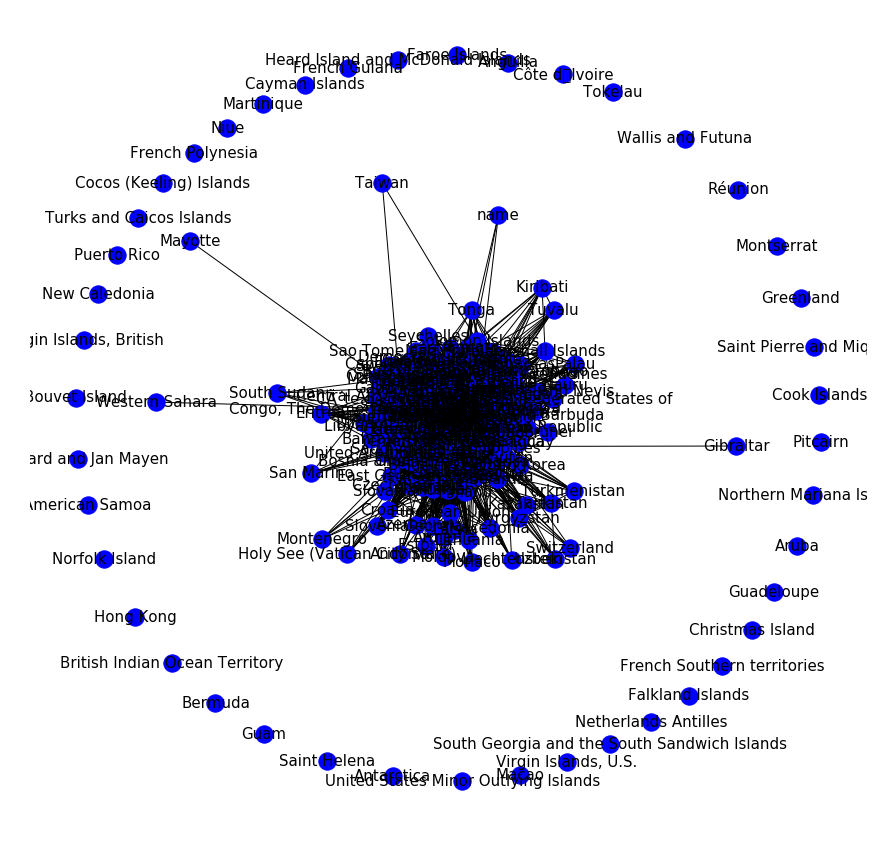

In [6]:
%matplotlib inline
import networkx as nx
import warnings
import matplotlib.pyplot as plt
gfig, gax = plt.subplots(figsize = (15, 15))
warnings.filterwarnings('ignore')
g = nx.Graph()

g.add_nodes_from(matrix_1) 
for key in matrix_1: 
    for key2 in matrix_1[key]: 
        if matrix_1[key][key2] > 100:
            g.add_edge(key, key2) 



pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, font_size=15, node_color = "blue", iterations = 5000)